In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

In [7]:
# Set dictionaries to convert labels to numeric values
hand_dict = {
    'Right': 0,
    'Left': 1
}

letter_dict = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'e': 4,
    'f': 5,
    'g': 6,
    'h': 7,
    'i': 8,
    'k': 9,
    'l': 10,
    'm': 11,
    'n': 12,
    'o': 13,
    'p': 14,
    'q': 15,
    'r': 16,
    's': 17,
    't': 18,
    'u': 19,
    'v': 20,
    'w': 21,
    'x': 22,
    'y': 23,
}

In [8]:
# Read datafile
def read_datafile():
    data = pd.read_csv("data/WZUM_dataset.csv")
    
    return data

In [9]:
# Drop not needed columns
data = read_datafile()
cols_x = ['world_landmark_' + str(i) + '.x' for i in range(21)]
cols_y = ['world_landmark_' + str(i) + '.y' for i in range(21)]
cols_z = ['world_landmark_' + str(i) + '.z' for i in range(21)]
data.drop(['handedness.score', 'Unnamed: 0'], axis=1, inplace=True)
data.drop(cols_x, axis=1, inplace=True)
data.drop(cols_y, axis=1, inplace=True)
data.drop(cols_z, axis=1, inplace=True)
print(data.describe())
print(data)
print(data.info())

       landmark_0.x  landmark_0.y  landmark_0.z  landmark_1.x  landmark_1.y  \
count   2179.000000   2179.000000  2.179000e+03   2179.000000   2179.000000   
mean       0.507922      0.681558  1.790320e-09      0.509529      0.640425   
std        0.199863      0.132932  7.199878e-09      0.161905      0.122924   
min        0.020139      0.211821 -3.184994e-08      0.071752      0.244683   
25%        0.345472      0.599185 -1.377124e-09      0.388826      0.561368   
50%        0.498865      0.697999  2.140613e-09      0.510629      0.649724   
75%        0.681261      0.771726  5.765542e-09      0.636919      0.725351   
max        1.006300      1.070837  2.496339e-08      0.931520      1.054156   

       landmark_1.z  landmark_2.x  landmark_2.y  landmark_2.z  landmark_3.x  \
count   2179.000000   2179.000000   2179.000000   2179.000000   2179.000000   
mean      -0.017844      0.511594      0.576750     -0.035785      0.513217   
std        0.045113      0.142987      0.117887    

<Axes: >

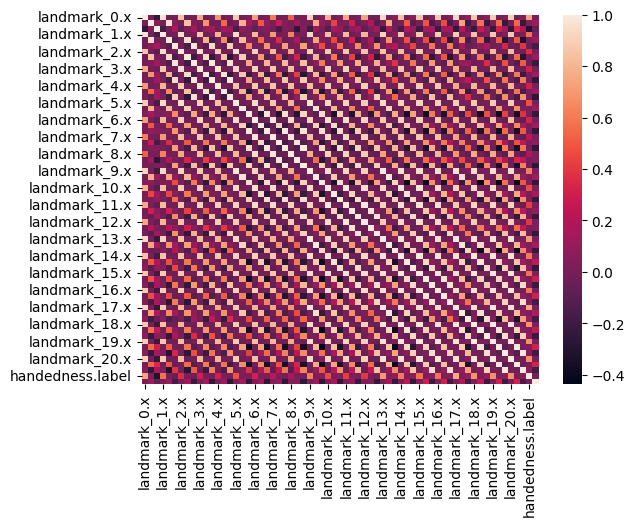

In [7]:
# Display heatmap of data
# print(specific_data.keys())
correlation = data.corr()
# print(correlation)
sns.heatmap(correlation)

In [8]:
y = data['letter']
x = data.drop(['letter'], axis=1)
print(data)

      landmark_0.x  landmark_0.y  landmark_0.z  landmark_1.x  landmark_1.y  \
0         0.325574      0.540680  2.419581e-10      0.407832      0.528459   
1         0.321148      0.545610  5.037693e-10      0.402533      0.532872   
2         0.320108      0.545769 -7.448848e-10      0.403666      0.530298   
3         0.327688      0.724617  7.299926e-09      0.404018      0.673304   
4         0.331169      0.726063  7.669146e-09      0.406985      0.674148   
...            ...           ...           ...           ...           ...   
2174      0.597982      0.481347 -3.792591e-09      0.657560      0.451795   
2175      0.523815      0.289770  2.527619e-09      0.516523      0.340299   
2176      0.524108      0.274084  3.850954e-09      0.515982      0.327549   
2177      0.491456      0.246983  5.876467e-09      0.469135      0.260957   
2178      0.518826      0.232748  5.095163e-09      0.498457      0.245651   

      landmark_1.z  landmark_2.x  landmark_2.y  landmark_2.z  l

In [9]:
data_top = data.columns
for col in data_top:
    print(col)

landmark_0.x
landmark_0.y
landmark_0.z
landmark_1.x
landmark_1.y
landmark_1.z
landmark_2.x
landmark_2.y
landmark_2.z
landmark_3.x
landmark_3.y
landmark_3.z
landmark_4.x
landmark_4.y
landmark_4.z
landmark_5.x
landmark_5.y
landmark_5.z
landmark_6.x
landmark_6.y
landmark_6.z
landmark_7.x
landmark_7.y
landmark_7.z
landmark_8.x
landmark_8.y
landmark_8.z
landmark_9.x
landmark_9.y
landmark_9.z
landmark_10.x
landmark_10.y
landmark_10.z
landmark_11.x
landmark_11.y
landmark_11.z
landmark_12.x
landmark_12.y
landmark_12.z
landmark_13.x
landmark_13.y
landmark_13.z
landmark_14.x
landmark_14.y
landmark_14.z
landmark_15.x
landmark_15.y
landmark_15.z
landmark_16.x
landmark_16.y
landmark_16.z
landmark_17.x
landmark_17.y
landmark_17.z
landmark_18.x
landmark_18.y
landmark_18.z
landmark_19.x
landmark_19.y
landmark_19.z
landmark_20.x
landmark_20.y
landmark_20.z
handedness.label
letter


Text(0.5, 1.0, 'All data')

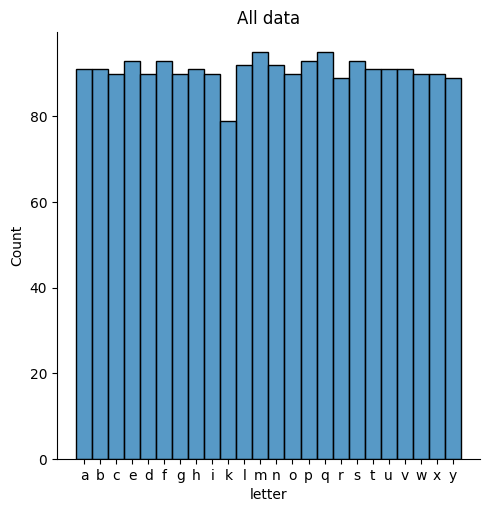

In [7]:
# Print data distribution
sns.displot(data=data, x="letter", multiple="stack")
plt.title('All data')

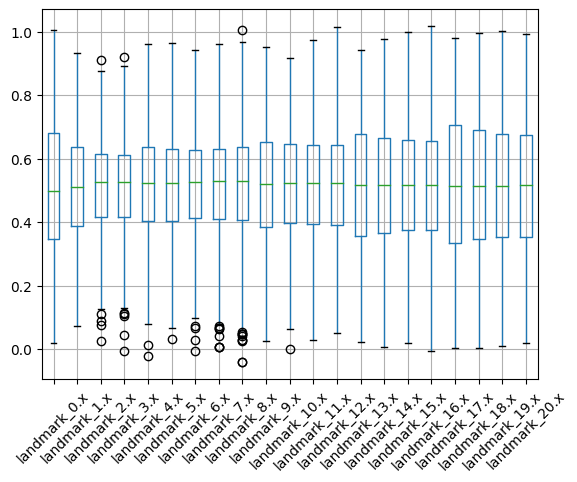

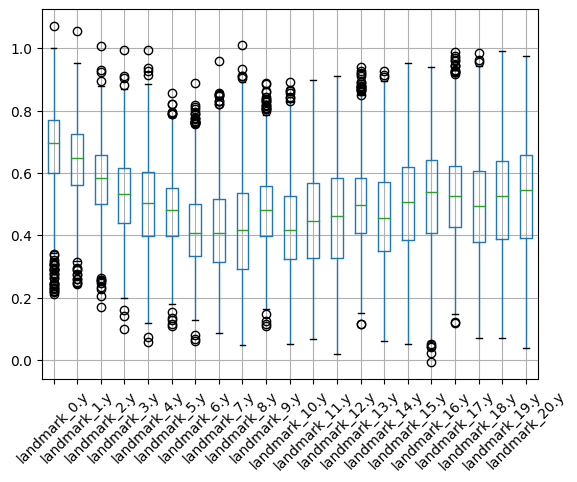

['landmark_0.z', 'landmark_1.z', 'landmark_2.z', 'landmark_3.z', 'landmark_4.z', 'landmark_5.z', 'landmark_6.z', 'landmark_7.z', 'landmark_8.z', 'landmark_9.z', 'landmark_10.z', 'landmark_11.z', 'landmark_12.z', 'landmark_13.z', 'landmark_14.z', 'landmark_15.z', 'landmark_16.z', 'landmark_17.z', 'landmark_18.z', 'landmark_19.z', 'landmark_20.z']


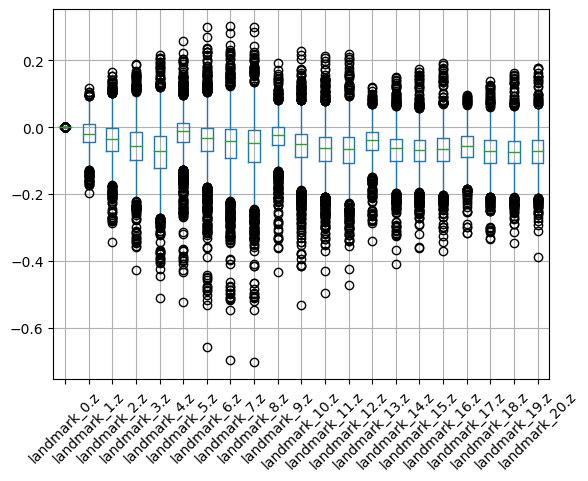

In [22]:
hand_x = ['landmark_' + str(i) + '.x' for i in range(21)]
data.boxplot(column=hand_x)
plt.xticks(rotation = 45)
plt.show()
mean_x = []
for col_name in hand_x:
    mean_x.append(data[col_name].mean())
    
hand_y = ['landmark_' + str(i) + '.y' for i in range(21)]
data.boxplot(column=hand_y)
plt.xticks(rotation = 45)
plt.show()
mean_y = []
for col_name in hand_y:
    mean_y.append(data[col_name].mean())
    
hand_z = ['landmark_' + str(i) + '.z' for i in range(21)]
print(hand_z)
data.boxplot(column=hand_z)
plt.xticks(rotation = 45)
plt.show()
mean_z = []
for col_name in hand_z:
    mean_z.append(data[col_name].mean())

/tmp/ipykernel_8080/2824621686.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)
/tmp/ipykernel_8080/2824621686.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter3D(mean_x, mean_y, mean_z, c=np.random.rand(3,), label=letter)


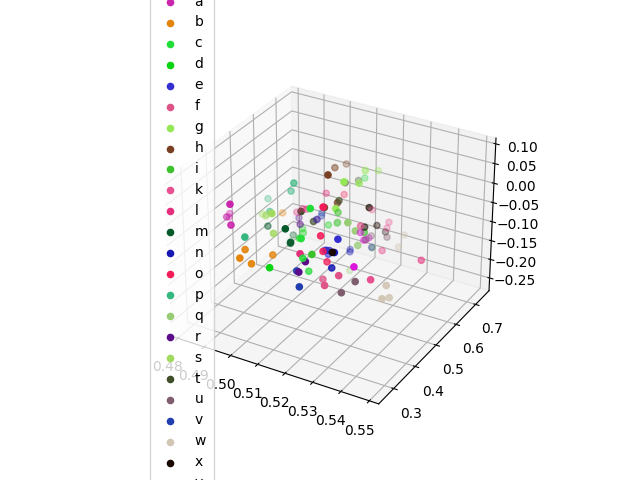

In [49]:
# Group by letters and plot means on plot
letters = letter_dict.keys()
hand_x = ['landmark_' + str(i*4 + 3) + '.x' for i in range(0,5)]
hand_y = ['landmark_' + str(i*4 + 3) + '.y' for i in range(0,5)]
hand_z = ['landmark_' + str(i*4 + 3) + '.z' for i in range(0,5)]

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
# specific_data = data.loc[data['letter'] == 'a']
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
cmap = get_cmap(len(letters))
for letter in letters:
    letter_data = data.loc[data['letter'] == letter]
    mean_x = []
    mean_y = []
    mean_z = []
    for col_name in hand_x:
        mean_x.append(letter_data[col_name].mean())
    for col_name in hand_y:
        mean_y.append(letter_data[col_name].mean())
    for col_name in hand_z:
        mean_z.append(letter_data[col_name].mean())
    
    ax.scatter3D(mean_x, mean_y, mean_z, c=np.random.rand(3,), label=letter)
plt.legend(loc="center left")
plt.show()
# data.groupby(by='letter')
# data.boxplot()
# plt.xticks(rotation = 45)
# plt.show()

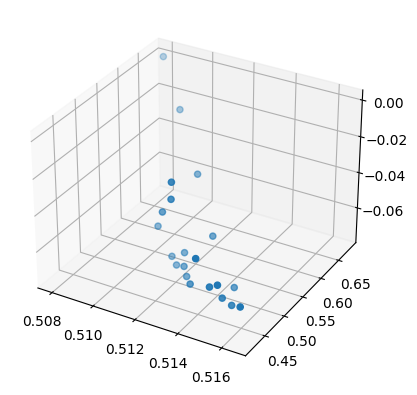

In [21]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(mean_x, mean_y, mean_z)

In [75]:
# Split to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
print(X_train.values)
x_array = x.to_numpy()

[[ 5.69113016e-01  6.74645305e-01 -6.01699635e-10 ...  7.35502064e-01
  -8.22406039e-02  1.00000000e+00]
 [ 4.18743163e-01  6.22241020e-01 -2.51006244e-10 ...  3.40196341e-01
  -1.24875031e-01  0.00000000e+00]
 [ 3.78519505e-01  7.32741714e-01  6.37772901e-09 ...  3.70652258e-01
  -6.01211488e-02  0.00000000e+00]
 ...
 [ 3.30153495e-01  8.39230299e-01  1.73553893e-09 ...  5.25088191e-01
  -7.37786815e-02  0.00000000e+00]
 [ 6.31398261e-01  8.51814151e-01 -1.88762406e-09 ...  6.22418702e-01
  -1.00311890e-01  1.00000000e+00]
 [ 3.25574219e-01  5.40679872e-01  2.41958092e-10 ...  3.93798143e-01
  -6.08073920e-02  0.00000000e+00]]


In [6]:
# Convert to numeric values
data['letter'] = [letter_dict[letter] for letter in data['letter']]
data['handedness.label'] = [hand_dict[label] for label in data['handedness.label']]

Text(0.5, 1.0, 'Test data')

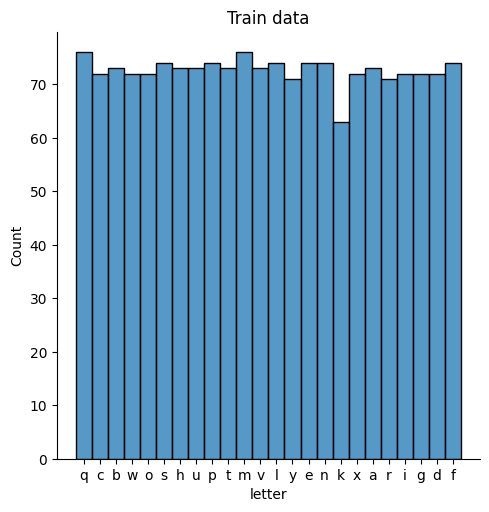

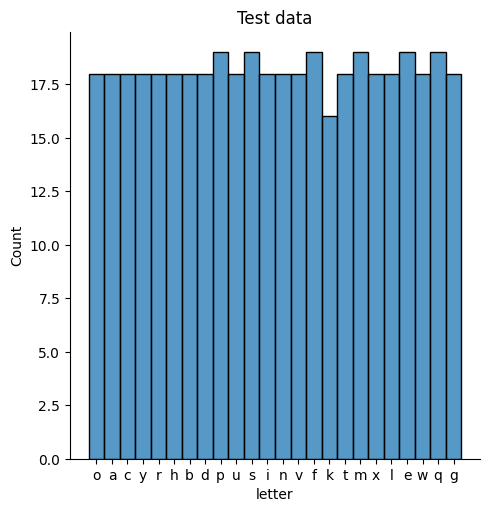

In [12]:
# Display features distribution in datasets
sns.displot(data=y_train, multiple="stack")
plt.title('Train data')
sns.displot(data=y_test, multiple="stack")
plt.title('Test data')

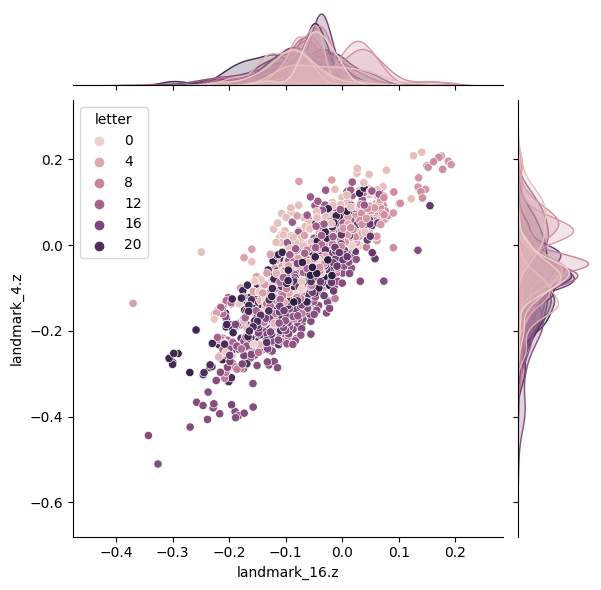

In [79]:
# Toy with landmarks and letters relationships
sns.jointplot(data=data, x="landmark_16.z", y="landmark_4.z", hue="letter")

<Axes: >

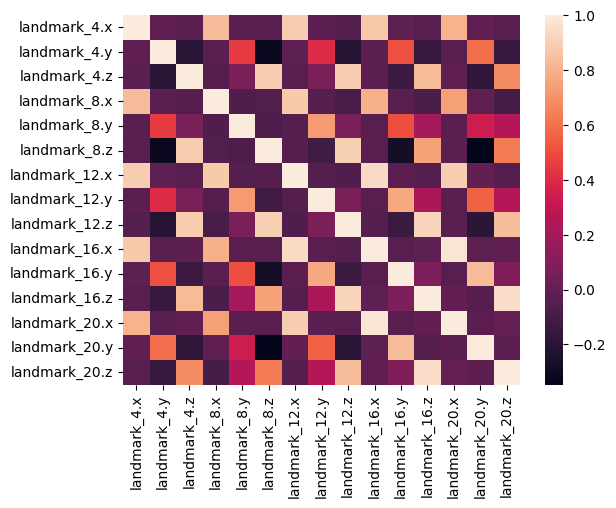

In [72]:
# Check correlations on finger tips
fingertips = x[['landmark_4.x', 'landmark_4.y', 'landmark_4.z',
               'landmark_8.x', 'landmark_8.y', 'landmark_8.z',
               'landmark_12.x', 'landmark_12.y', 'landmark_12.z',
               'landmark_16.x', 'landmark_16.y', 'landmark_16.z',
               'landmark_20.x', 'landmark_20.y', 'landmark_20.z']]
sns.heatmap(fingertips.corr())

<Axes: >

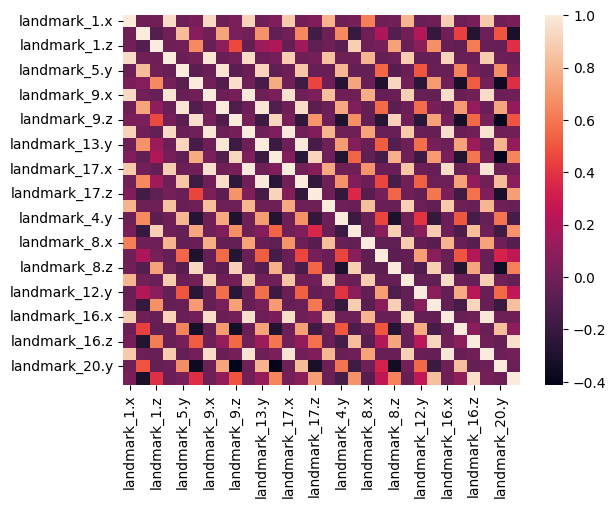

In [73]:
# Check correlations on finger_mcp
finger_mcp = x[['landmark_1.x', 'landmark_1.y', 'landmark_1.z',
               'landmark_5.x', 'landmark_5.y', 'landmark_5.z',
               'landmark_9.x', 'landmark_9.y', 'landmark_9.z',
               'landmark_13.x', 'landmark_13.y', 'landmark_13.z',
               'landmark_17.x', 'landmark_17.y', 'landmark_17.z',
               'landmark_4.x', 'landmark_4.y', 'landmark_4.z',
               'landmark_8.x', 'landmark_8.y', 'landmark_8.z',
               'landmark_12.x', 'landmark_12.y', 'landmark_12.z',
               'landmark_16.x', 'landmark_16.y', 'landmark_16.z',
               'landmark_20.x', 'landmark_20.y', 'landmark_20.z']]
sns.heatmap(finger_mcp.corr())

<Axes: >

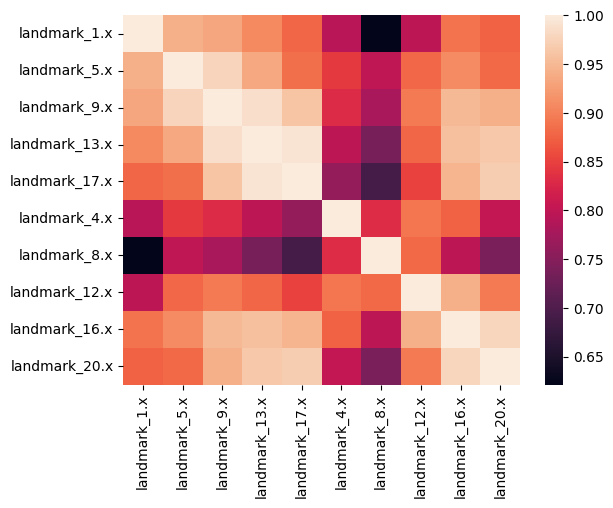

In [49]:
# Check correlations on finger_x
finger_mcp = x[['landmark_1.x',
               'landmark_5.x', 
               'landmark_9.x', 
               'landmark_13.x',
               'landmark_17.x',
               'landmark_4.x', 
               'landmark_8.x', 
               'landmark_12.x',
               'landmark_16.x',
               'landmark_20.x']]
sns.heatmap(finger_mcp.corr())

<Axes: >

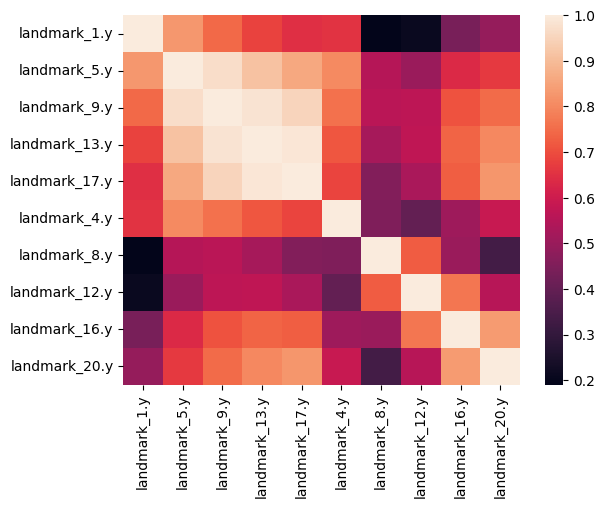

In [74]:
# Check correlations on finger_y
finger_mcp = x[['landmark_1.y', 
                'landmark_5.y', 
                'landmark_9.y', 
                'landmark_13.y',
                'landmark_17.y',
                'landmark_4.y', 
                'landmark_8.y',
                'landmark_12.y',
                'landmark_16.y',
                'landmark_20.y']]
sns.heatmap(finger_mcp.corr())

<Axes: >

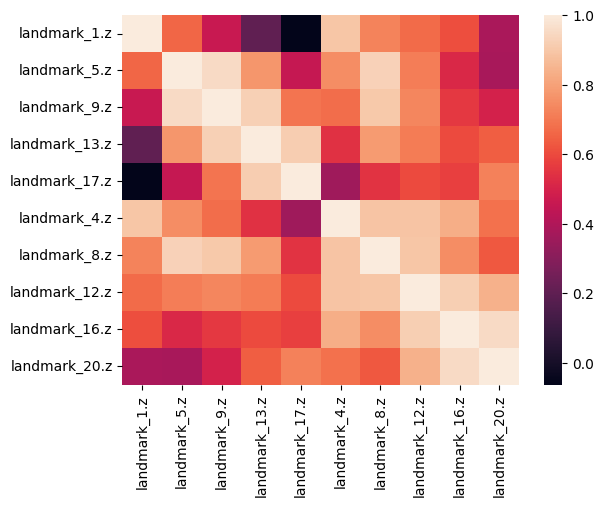

In [75]:
# Check correlations on finger_z
finger_mcp = x[['landmark_1.z',
               'landmark_5.z',
               'landmark_9.z',
                'landmark_13.z',
                'landmark_17.z',
               'landmark_4.z',
               'landmark_8.z',
                'landmark_12.z',
                'landmark_16.z',
                'landmark_20.z']]
sns.heatmap(finger_mcp.corr())

<Axes: >

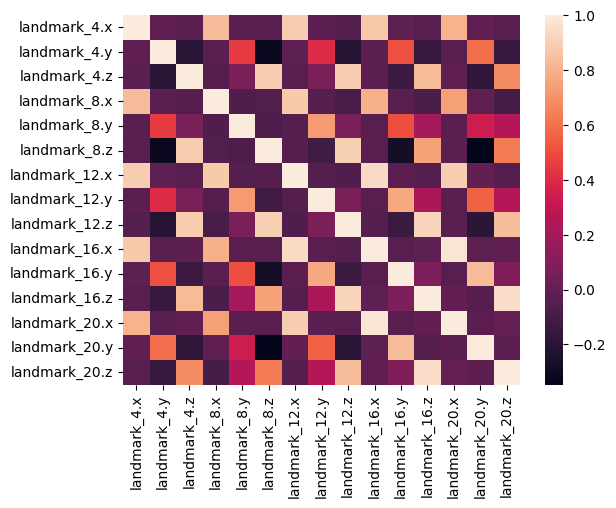

In [81]:
fingertips_and_mcp = x[['landmark_1.x', 'landmark_1.y', 'landmark_1.z',
               'landmark_5.x', 'landmark_5.y', 'landmark_5.z',
               'landmark_9.x', 'landmark_9.y', 'landmark_9.z',
               'landmark_13.x', 'landmark_13.y', 'landmark_13.z',
               'landmark_17.x', 'landmark_17.y', 'landmark_17.z',
               'handedness.label']]
sns.heatmap(fingertips.corr())

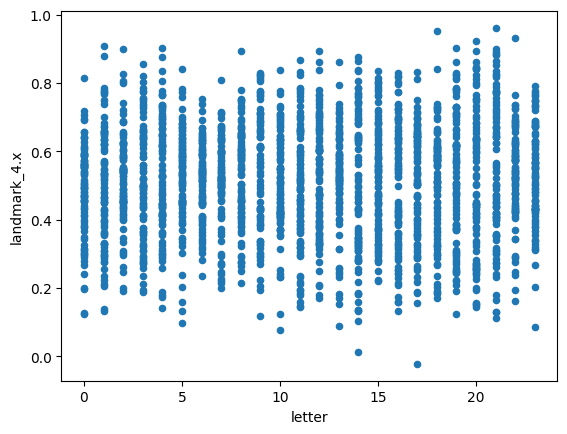

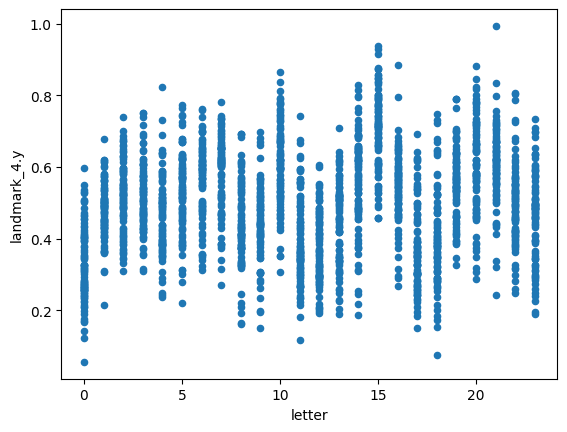

<Axes: xlabel='letter', ylabel='landmark_4.z'>

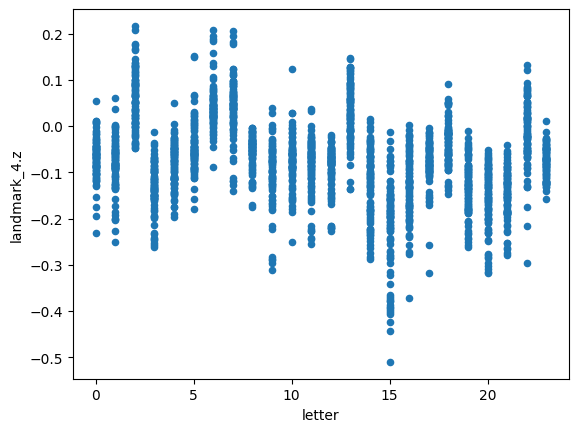

In [81]:
# Look at values distribution
ax1 = data.plot.scatter(x='letter', y='landmark_4.x')
plt.show()
data.plot.scatter(x='letter', y='landmark_4.y')
plt.show()
data.plot.scatter(x='letter', y='landmark_4.z')

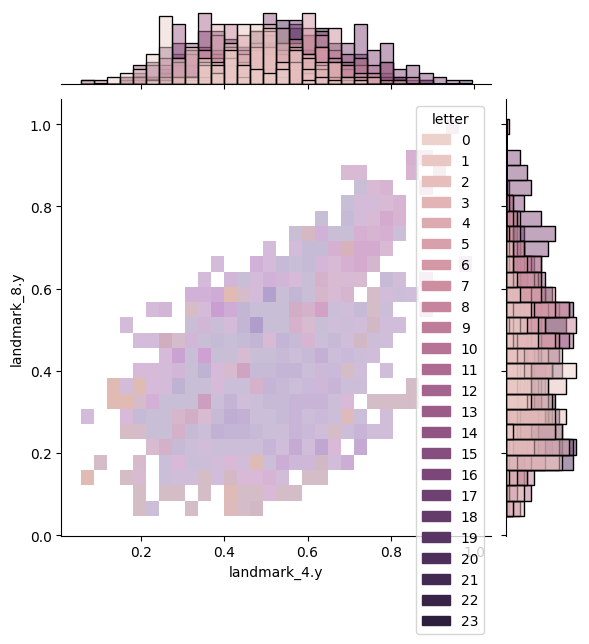

In [78]:
# Toy with landmarks relationships 
sns.jointplot(data=data, x="landmark_4.y", y="landmark_8.y", hue="letter", kind="hist")

## Problem with bad matches (Inspectiion of why results are worse then in other cases)
Bad matches are:
- r with u
- u with v
- i with y
- a with s

In [76]:
values = [letter_dict['a'], letter_dict['r'], letter_dict['u'], letter_dict['v'], letter_dict['i'], letter_dict['y'], letter_dict['s']]
specific_data = data.loc[data['letter'].isin(values)]
print(specific_data)

      landmark_0.x  landmark_0.y  landmark_0.z  landmark_1.x  landmark_1.y  \
0         0.325574      0.540680  2.419581e-10      0.407832      0.528459   
1         0.321148      0.545610  5.037693e-10      0.402533      0.532872   
2         0.320108      0.545769 -7.448848e-10      0.403666      0.530298   
24        0.463756      0.747139 -1.218366e-08      0.525357      0.722836   
25        0.462346      0.735407 -1.337717e-08      0.520044      0.709683   
...            ...           ...           ...           ...           ...   
2170      0.597794      0.483764 -1.472110e-09      0.656984      0.443731   
2171      0.562683      0.443246 -2.747345e-10      0.616616      0.415777   
2172      0.587162      0.486453 -6.262936e-09      0.640467      0.438502   
2173      0.603523      0.378780 -1.011744e-09      0.664804      0.360554   
2174      0.597982      0.481347 -3.792591e-09      0.657560      0.451795   

      landmark_1.z  landmark_2.x  landmark_2.y  landmark_2.z  l

In [38]:
def get_list_of_x(keys):
    lst = [] 
    for key in keys:
        if key[-1]=='x':
            lst.append(key)
    return lst

<Axes: >

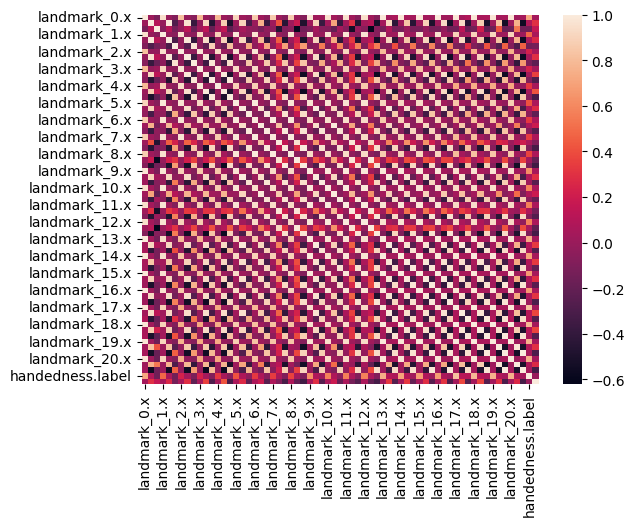

In [77]:
# Print correlations for landmarks
correlation = specific_data.corr()
# print(correlation)
sns.heatmap(correlation)

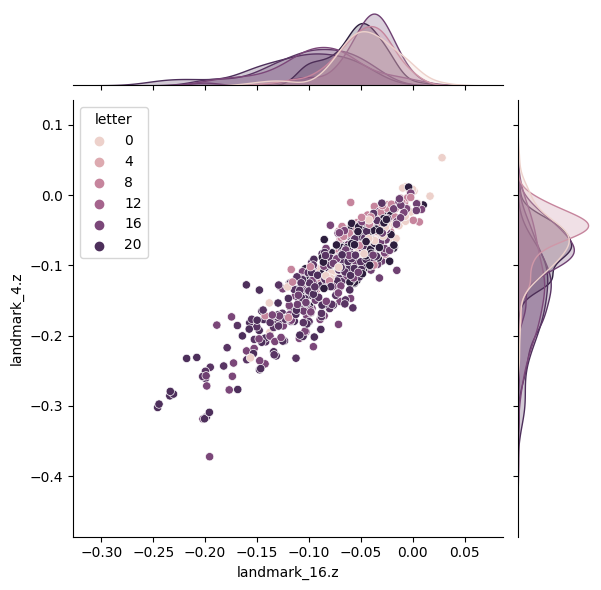

In [80]:
# Display landmarks relationships
sns.jointplot(data=specific_data, x="landmark_16.z", y="landmark_4.z", hue="letter")

## Decisions boundaries tests

Section dedicated to Decision boundaries tests

Iteration 1, loss = 1.76216065
Iteration 2, loss = 1.17414423
Iteration 3, loss = 1.05059796
Iteration 4, loss = 1.05527269
Iteration 5, loss = 1.04691230
Iteration 6, loss = 1.02712197
Iteration 7, loss = 1.01734936
Iteration 8, loss = 1.00977498
Iteration 9, loss = 1.00006161
Iteration 10, loss = 0.99082413
Iteration 11, loss = 0.98581151
Iteration 12, loss = 0.97754915
Iteration 13, loss = 0.96914324
Iteration 14, loss = 0.96117156
Iteration 15, loss = 0.95422952
Iteration 16, loss = 0.95451048
Iteration 17, loss = 0.94580204
Iteration 18, loss = 0.93706730
Iteration 19, loss = 0.93140700
Iteration 20, loss = 0.92426694
Iteration 21, loss = 0.92014076
Iteration 22, loss = 0.91469375
Iteration 23, loss = 0.91728424
Iteration 24, loss = 0.90840579
Iteration 25, loss = 0.90451811
Iteration 26, loss = 0.90561517
Iteration 27, loss = 0.90132477
Iteration 28, loss = 0.89668106
Iteration 29, loss = 0.89212848
Iteration 30, loss = 0.88629956
Iteration 31, loss = 0.88339947
Iteration 32, los

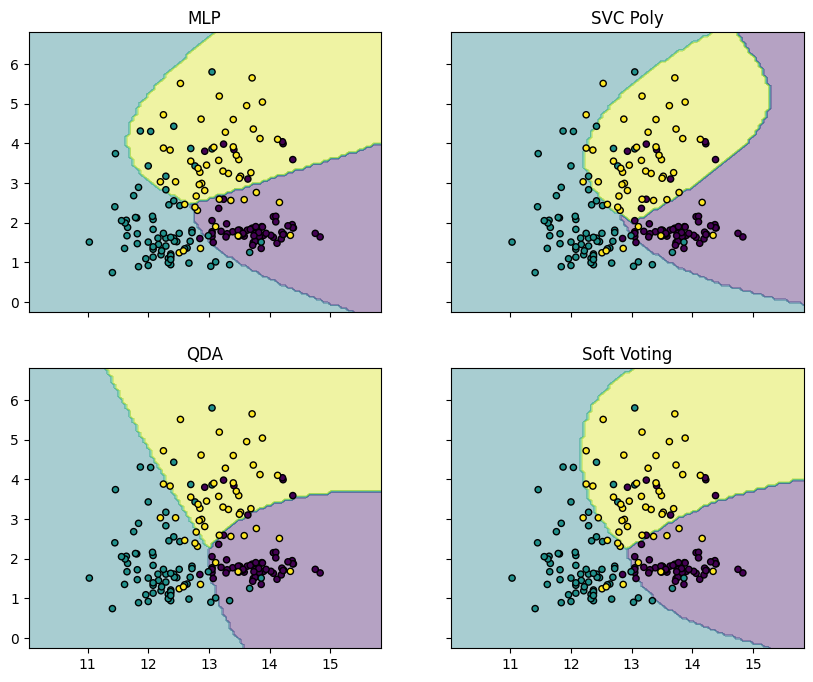

In [1]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

def make_data(n):
    Y = np.random.choice([-1, +1], size=n)
    X = np.random.normal(size = (n, 2))
    for i in range(len(Y)):
        X[i] += Y[i]*np.array([-2, 0.9])
    return X, Y

data = datasets.load_wine()
X = data.data[:, :2]
y_ = data.target

# iris = datasets.load_iris()
# X = iris.data[:, [0, 2]]
# y = iris.target
# print(y)

# X = np.array([x['landmark_4.x'].to_numpy(), x['landmark_8.x'].to_numpy()]).T
# y_ = y
# print(y_)
# np.random.seed(0)
# X, y = make_data(200)

clf2 = SVC(kernel='poly', probability=True, degree=5, C=12.0)

# Neural network with custom params
clf1 = MLPClassifier(solver='adam', activation='tanh', learning_rate='constant', alpha=1e-6, random_state=42, 
                     shuffle=True, batch_size=16, max_iter=800, warm_start=True, verbose=True, learning_rate_init=0.00064, power_t=0.31)

# Quadratic Classifier with low tolerance
clf3 = QuadraticDiscriminantAnalysis(tol=1e-7)

clf4 = RandomForestClassifier(criterion='log_loss', n_estimators=160)

# Set VotingClassifier to ensamble both classifiers above
eclf = VotingClassifier(estimators=[("mlpc", clf1), ('svc', clf2), ('qda', clf3)],
                        voting='soft',
                        weights=[3.1, 2.8, 2.9])

clf1.fit(X, y_)
clf2.fit(X, y_)
clf3.fit(X, y_)
clf4.fit(X, y_)
eclf.fit(X, y_)

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["MLP", "SVC Poly", "QDA","Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y_, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
